In [49]:
%matplotlib inline

In [50]:
from matplotlib import pyplot as plt

In [4]:
import sqlalchemy
import pandas as pd

import os.path

In [47]:
from IPython.core.display import display, HTML

In [5]:
engine = sqlalchemy.create_engine(open(os.path.expanduser('~/.sqlconninfo')).read())

In [78]:
z = pd.read_sql('select count(*) from subway_ingest;', engine)
z

,count
0,75006861


In [ ]:
z = pd.read_sql('select ca, unit, scp, station, linename from subway_ingest;', engine)

In [84]:
z

,ca
0,R229
1,R229
2,R229
3,R229
4,R229
5,R229
6,R229
7,R229
8,R229
9,R229


In [39]:
z2 = pd.read_sql("select * from subway_ingest where ca='N062' and unit='R011' and scp='01-03-00' ORDER BY endtime;", engine)

In [40]:
z3 = z2[1:].copy()

In [41]:
z3.cumul_entries = z2.cumul_entries.values[1:] - z2.cumul_entries.values[:-1]

In [42]:
z3.cumul_exits = z2.cumul_exits.values[1:] - z2.cumul_exits.values[:-1]

In [53]:
z4 = z3['endtime cumul_entries cumul_exits'.split()].groupby('endtime').sum()

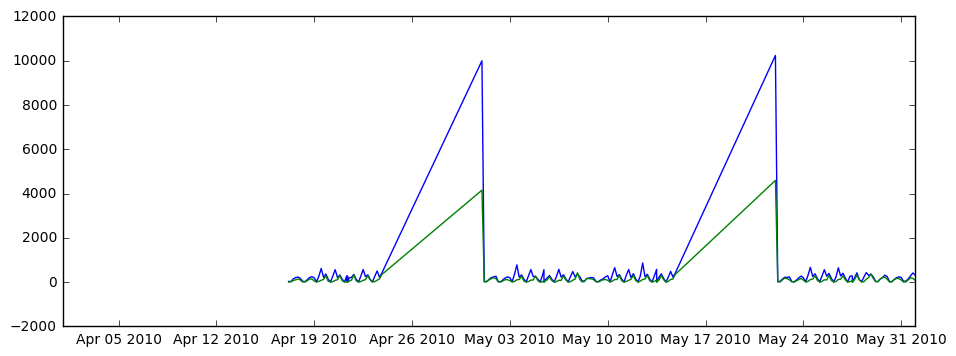

In [73]:
plt.plot(z4.index.values, z4.cumul_entries.values
        )
plt.plot(z4.index.values,  z4.cumul_exits.values
        )
# plt.ylim(0, 700)
plt.xlim('2010-04-01', '2010-06-01')
plt.gcf().set_size_inches(11, 4)

In [76]:
z3.endtime.dtype

dtype('<M8[ns]')

In [48]:
display(HTML(z3.head(200).to_html()))

,turnstile_id,endtime,ca,unit,scp,station,linename,division,description,cumul_entries,cumul_exits
1,50620,2010-04-17 04:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,35,6
2,50621,2010-04-17 08:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,26,18
3,50622,2010-04-17 12:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,143,74
4,50623,2010-04-17 16:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,208,104
5,50624,2010-04-17 20:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,230,142
6,50625,2010-04-18 00:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,176,103
7,50626,2010-04-18 04:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,39,7
8,50627,2010-04-18 08:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,22,11
9,50628,2010-04-18 12:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,109,69
10,50629,2010-04-18 16:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,214,136


In [38]:
z2

,turnstile_id,endtime,ca,unit,scp,station,linename,division,description,cumul_entries,cumul_exits
0,50466,2010-04-17 00:00:00,N062,R011,01-00-00,NULL,NULL,NULL,REGULAR,6001528,26135188
1,50619,2010-04-17 00:00:00,N062,R011,01-03-00,NULL,NULL,NULL,REGULAR,6766725,3846177
2,50769,2010-04-17 00:00:00,N062,R011,01-03-03,NULL,NULL,NULL,REGULAR,4571499,5790326
3,50819,2010-04-17 00:00:00,N062,R011,01-03-04,NULL,NULL,NULL,REGULAR,8208958,13612511
4,50517,2010-04-17 00:00:00,N062,R011,01-00-01,NULL,NULL,NULL,REGULAR,5405443,7757147
5,50568,2010-04-17 00:00:00,N062,R011,01-00-02,NULL,NULL,NULL,REGULAR,444993,338112
6,50669,2010-04-17 00:00:00,N062,R011,01-03-01,NULL,NULL,NULL,REGULAR,9444698,4628935
7,50869,2010-04-17 00:00:00,N062,R011,01-05-00,NULL,NULL,NULL,REGULAR,404,0
8,50719,2010-04-17 00:00:00,N062,R011,01-03-02,NULL,NULL,NULL,REGULAR,9150343,7293811
9,50918,2010-04-17 00:00:00,N062,R011,01-05-01,NULL,NULL,NULL,REGULAR,0,164
